### Лабораторная работа 5. Обучение без учителя. Кластеризация

#### Задачи:
Повторить скрипт на своём датасете



In [313]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


#### Описание датасета:
Для анализа используется датасет "weather_classification_data", который включает в себя различные характеристики, связанные с погодой, и классифицирует погоду по четырем типам: дождливая, солнечная, облачная и снежная.

- **Temperature (numeric):** температура в градусах Цельсия, от экстремально низкой до экстремально высокой температуры.
- **Humidity (numeric):** процент влажности, включая значения выше 100% для введения выбросов.
- **Wind Speed (numeric):** скорость ветра в километрах в час, с диапазоном, включающим нереалистично высокие значения.
- **Precipitation (%) (numeric):** процент осадков, включая значения выбросов.
- **Cloud Cover (categorical):** описание облачного покрова.
- **Atmospheric Pressure (numeric):** атмосферное давление в гПа, охватывающее широкий диапазон.
- **UV Index (numeric):** УФ-индекс, указывающий силу ультрафиолетового излучения.
- **Season (categorical):** сезон, в течение которого были записаны данные.
- **Visibility (km) (numeric):** видимость в километрах, включая очень низкие или очень высокие значения.
- **Location (categorical):** тип местоположения, в котором были записаны данные.
- **Weather Type (categorical):** целевая переменная для классификации, указывающая тип погоды.


In [314]:
df = pd.read_csv('weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


#### Общие статистические данные

Размер датасета

In [315]:
df.shape

(13200, 11)

Проверим на пропуски

In [316]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Пропусков нет! И хорошо)

Информация о столбцах и типах данных в них

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [318]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [319]:
df.describe(include='object')

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


Проверим категориальные данные на допустимые значения

In [320]:
df['Cloud Cover'].unique()


array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [321]:
df['Season'].unique()


array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [322]:
df['Location'].unique()


array(['inland', 'mountain', 'coastal'], dtype=object)

In [323]:
df['Weather Type'].unique()


array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

Всё чисто

In [324]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

Набор идеально сбалансирован. Сказывается его синтетичность

Переведём категориальные признаки

In [325]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
res = enc.fit_transform(df[['Cloud Cover']])
df[enc.categories_[0]] = res.toarray()
res = enc.fit_transform(df[['Season']])
df[enc.categories_[0]] = res.toarray()
res = enc.fit_transform(df[['Location']])
df[enc.categories_[0]] = res.toarray()
df.drop(columns=['Cloud Cover', 'Season', 'Location'], inplace=True)

#from sklearn.preprocessing import OrdinalEncoder
#enc = OrdinalEncoder()
#df[['Weather Type']] = enc.fit_transform(df[['Weather Type']])
#df.head()


In [326]:
df_input = df.copy(deep=True)

df.drop(columns=['Temperature', 'Humidity', 'Wind Speed', 
                'UV Index','Weather Type', 'clear', 'cloudy', 'overcast',
                'partly cloudy', 'Autumn', 'Spring', 'Summer', 'Winter',
                'coastal', 'inland', 'mountain'], inplace=True)
df.head()


,Precipitation (%),Atmospheric Pressure,Visibility (km)
0,82.0,1010.82,3.5
1,71.0,1011.43,10.0
2,16.0,1018.72,5.5
3,82.0,1026.25,1.0
4,66.0,990.67,2.5


In [327]:
vals = df_input['Weather Type'].unique()
X = df
y = df_input['Weather Type'].replace(vals, [0, 1, 2, 3])
yvals = df_input['Weather Type']

C:\Users\Антон\AppData\Local\Temp\ipykernel_17092\3525606446.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_input['Weather Type'].replace(vals, [0, 1, 2, 3])


#### Алгоритм K-Means

In [328]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

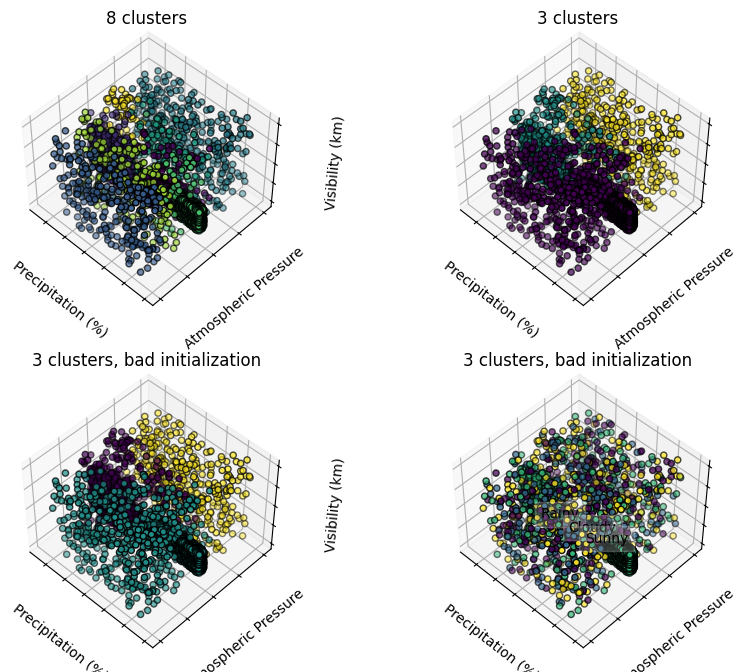

In [329]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    #ax.scatter(X['Temperature'], X['Humidity'], X['Wind Speed'], c=labels.astype(float), edgecolor="k")
    #
    #ax.xaxis.set_ticklabels([])
    #ax.yaxis.set_ticklabels([])
    #ax.zaxis.set_ticklabels([])
    #ax.set_xlabel("Temperature")
    #ax.set_ylabel("Humidity")
    #ax.set_zlabel("Wind Speed")
    #ax.set_title(title)
    ax.scatter(X['Precipitation (%)'], X['Atmospheric Pressure'], X['Visibility (km)'], c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel('Precipitation (%)')
    ax.set_ylabel('Atmospheric Pressure')
    ax.set_zlabel('Visibility (km)')
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = df_input[df_input['Weather Type']==name]
    ax.text3D(
        #ds["Temperature"].mean(),
        #ds["Humidity"].mean(),
        #ds["Wind Speed"].mean(),
        ds['Precipitation (%)'].mean(),
        ds['Atmospheric Pressure'].mean(),
        ds['Visibility (km)'].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
    
#ax.scatter(X['Temperature'], X['Humidity'], X['Wind Speed'], c=y, edgecolor="k")
#ax.xaxis.set_ticklabels([])
#ax.yaxis.set_ticklabels([])
#ax.zaxis.set_ticklabels([])
#ax.set_xlabel("Temperature")
#ax.set_ylabel("Humidity")
#ax.set_zlabel("Wind Speed")
#ax.set_title("Ground Truth")
ax.scatter(X['Precipitation (%)'], X['Atmospheric Pressure'], X['Visibility (km)'], c=y, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Precipitation (%)')
ax.set_ylabel('Atmospheric Pressure')
ax.set_zlabel('Visibility (km)')
ax.set_title(title)

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()


#### Метрики

In [330]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [331]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [332]:
best_metric

[np.int64(10),
 np.float64(0.4261424159576617),
 0.3501809451868192,
 array([[  37.33527542, 1009.50693326,    6.87394068],
        [  59.1745283 ,  915.15849057,    9.86084906],
        [  72.59865972, 1012.84545048,    3.92181683],
        [  58.16756757, 1086.8527027 ,   10.22432432],
        [  51.8467433 , 1159.95559387,    9.56321839],
        [  61.70513447,  991.85202934,    3.23691932],
        [  52.69361702,  839.5653617 ,    9.98297872],
        [  11.40594059, 1017.74660745,    7.43462434],
        [  87.94034938,  991.26121432,    3.11418833],
        [  95.316     , 1012.664608  ,    4.466     ]])]

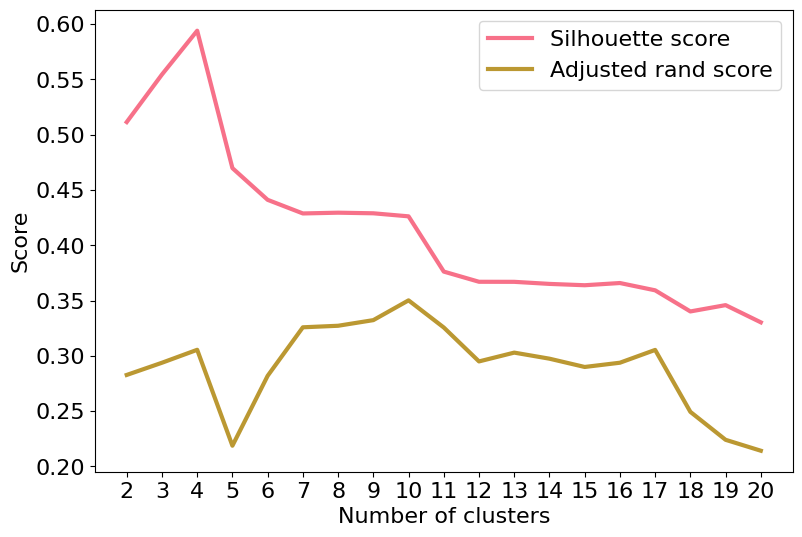

In [333]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


#plt.figure(figsize=(9, 6))
#plt.plot(n_clusters, within_cluster_dist_values, linewidth=3, label='Within-cluster distance')
#plt.xlabel('Number of clusters', size=16)
#plt.ylabel('Score', size=16)
#plt.xticks(n_clusters, size=16)
#plt.yticks(size=16)
#plt.legend(loc='best', fontsize=16)

#plt.show()

#### Иерархическая кластеризация

In [334]:
from scipy.cluster.hierarchy import linkage, dendrogram

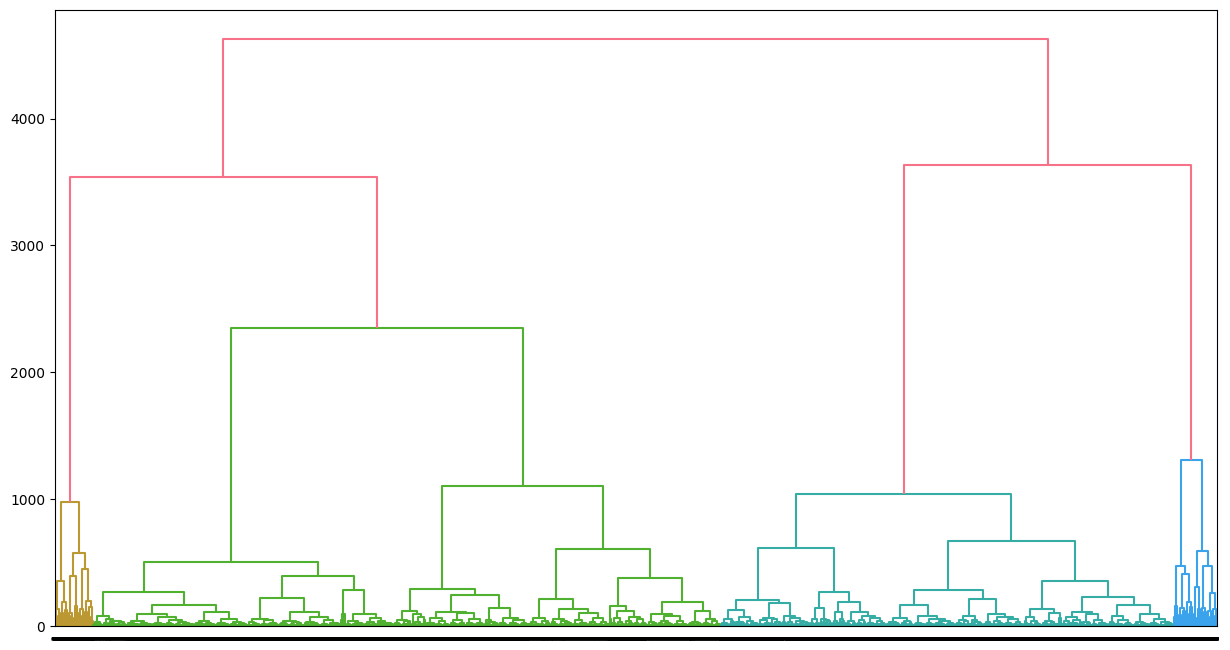

In [335]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

#### DBSCAN

In [336]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [337]:
mins = X.shape[1]

['y', 'b', 'g', 'r']


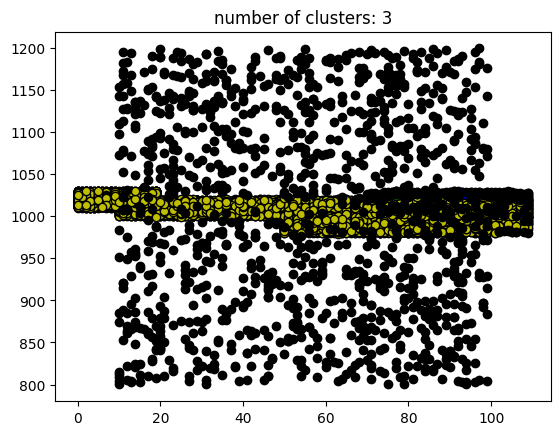

In [487]:
db = DBSCAN(eps=2.1, min_samples=12).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result
#ax.scatter(X['Precipitation (%)'], X['Atmospheric Pressure'], X['Visibility (km)'], c=y, edgecolor="k")

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy['Precipitation (%)'], xy['Atmospheric Pressure'], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy['Precipitation (%)'], xy['Atmospheric Pressure'], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


Черные точки - это выбросы. Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

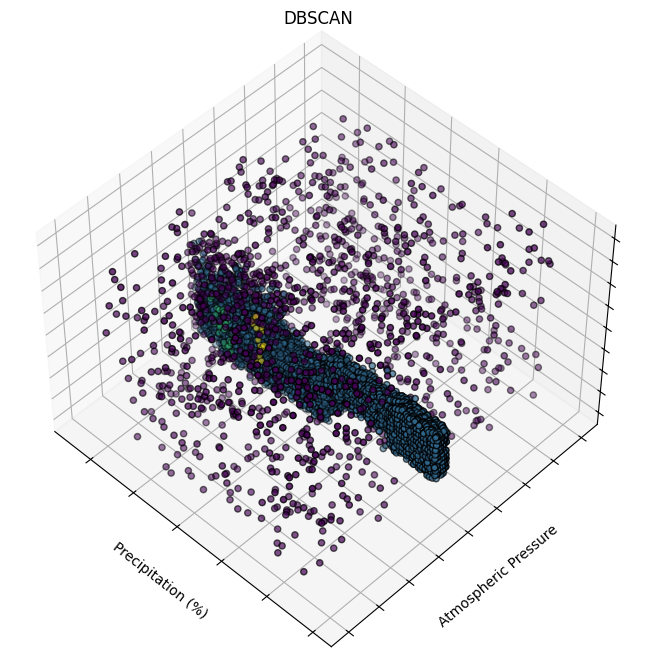

In [488]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)


ax.scatter(X['Precipitation (%)'], X['Atmospheric Pressure'], X['Visibility (km)'], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Precipitation (%)')
ax.set_ylabel('Atmospheric Pressure')
ax.set_zlabel('Visibility (km)')
ax.set_title("DBSCAN")


plt.show()

Для оценки алгоритмов кластеризации мы будем использовать оценку силуэта и оценку скорректированного рэнда. Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.

In [489]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.06
Adjusted Rand Index: 0.00
